In [1]:
from utils import *

481 x 321


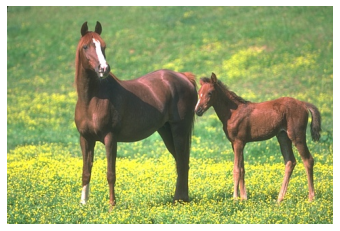

In [2]:
img_path = 'horses.jpg'

# Read image in correct RGB format
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
print(w, 'x', h)
show_inplace(img)

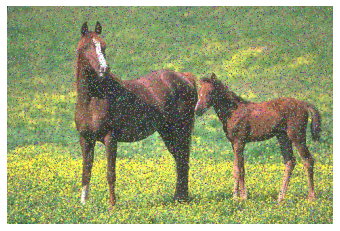

In [3]:
# Optional step to add salt-and-pepper noise to the image
probability = 0.2
for y in range(h):
    for x in range(w):
        if r() <= probability:
            img[y][x][0] = int(r() * 255)
            img[y][x][1] = int(r() * 255)
            img[y][x][2] = int(r() * 255)
show_inplace(img)

Number of superpixels: 187


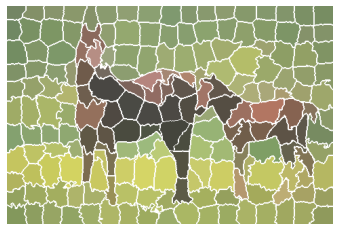

True

In [4]:
# Convert RGB to CIELAB format which is perceptually uniform for small color differences
img = img/255
lab = rgb2lab(img)

# Run Fuzzy SLIC
superpixels = fslic(lab, initial_num_clusters=200, compactness=17, max_iterations=10)
print("Number of superpixels:", len(np.unique(superpixels.reshape((h*w, 3)), axis=0)))

# Convert result back to RGB and display result with contours
result = lab2rgb(superpixels)
unique_labels = np.unique(result.reshape((-1, 3)), axis=0, return_inverse=True)[1].reshape((h, w))
contours = mark_boundaries(result, unique_labels, color=[1,1,1])
show_inplace(contours)
cv2.imwrite('fslic.jpg', cv2.cvtColor((255 * contours).astype(np.uint8), cv2.COLOR_RGB2BGR))

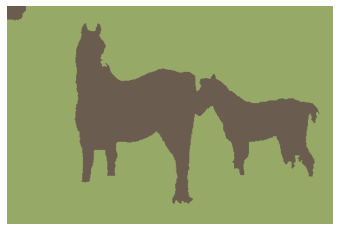

True

In [5]:
clustered = cluster_superpixels(superpixels)
colored = color_regions(clustered, img)
show_inplace(colored)
cv2.imwrite('output.jpg', cv2.cvtColor((255 * colored).astype(np.uint8), cv2.COLOR_RGB2BGR))